In [1]:
#pip install snownlp

In [2]:
from snownlp import SnowNLP
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [3]:
#画情感分析直方图
def plotsent(dataset):
    plt.hist(dataset['sentiments'],bins=20, facecolor="darkcyan") #edgecolor="gray", alpha=0.7)
    plt.xlabel('sentiments score')
    plt.ylabel("frequence of comments")
    plt.xticks(numpy.arange(0, 1.1, 0.1))

In [4]:
# 只要满足下面的一个特征，就被认为是粉丝
firstFeatures = [
    'KUN',
    '坤',
    '徐坤',
    '蔡先生',
    '小蔡',
    'CXK',
    '菜菜',
    '蔡蔡',
    '小葵',
    '葵葵',
    '葵花',
    '葵奎',
    '奎葵',
    '甜葵',
    '奶葵',
    '坤坤',
    '困困',
    '菜困',
    '小困',
    '追困',
    '小坤',
    '坤哥',
    '爱困',
    '爱坤',
    '802',
    '82',
    'AUGUST',
    '八月'
]

In [5]:
def grouping(comdata):
    comdata['isFan'] = False
    for i in range(len(comdata)-1):
        for feat in firstFeatures:
            if feat in comdata.loc[i,'Usename']:
                comdata.loc[i,'isFan']=True
                break

## 媒体和机构

In [6]:
mediacom = pd.read_csv('fullmediacom.csv')
#mediacom.drop_duplicates(subset=['Usename','Time'],keep='first',inplace=True)
mediacom.drop_duplicates(subset=['Usename','Time','Comments'],keep='first',inplace=True)
#mediacom.to_csv('fullmediacom.csv')
len(mediacom)

19128

In [7]:
mediacomText = mediacom['Comments']
s1 =[SnowNLP(com).sentiments for com in mediacomText]
mediacom['sentiments'] = s1

In [8]:
weight = mediacom['Like_count']/2 #两个赞算一个评论

In [9]:
mediacom['weight']=weight #增加一个column记录权重

In [10]:
mediacom = mediacom.sort_values('Like_count',ascending = False)
mediacom = mediacom.reset_index()

In [11]:
mediacom = mediacom.drop(columns = ['index','Unnamed: 0'])
mediacom.head()

,Usename,Time,Like_count,Comments,blogger,sentiments,weight,isFan
0,唐三是个小暖心,Thu Mar 12 20:44:17 +0800 2020,23024.0,"""其实小蔡本身就没什么实质性黑点吧 所以一时的玩梗也不会一直持续 现在看就是挺好的一个小朋友""",mgyl,0.406927,11512.0,False
1,吃菜菜不吃菜菜-,Thu Mar 12 21:03:23 +0800 2020,16527.0,"""不是自嘲 是释然是算了是大方回应被恶意剪辑鬼畜掩盖了的兴趣爱好本身 温柔地说出“ 篮球是...",mgyl,0.999998,8263.5,True
2,282号发光虫,Thu Mar 12 20:04:19 +0800 2020,10549.0,"""多一些了解和靠近这个只是坚持自己的热爱的大男孩吧""",mgyl,0.928632,5274.5,True
3,抱月亮睡,Thu Mar 12 21:03:43 +0800 2020,9425.0,"""“喜欢唱 跳 rap 篮球“小蔡一直说的都是“喜欢篮球“恶意鬼畜剪辑可以使一个人面目全非，...",mgyl,0.997223,4712.5,False
4,GG-Pink,Sun Mar 15 13:34:01 +0800 2020,7426.0,"""严厉有温度，温柔有原则！超级暖心的蔡PD啊！""",xlzy,0.968051,3713.0,False


In [12]:
grouping(mediacom)

In [13]:
mediacom.head()

,Usename,Time,Like_count,Comments,blogger,sentiments,weight,isFan
0,唐三是个小暖心,Thu Mar 12 20:44:17 +0800 2020,23024.0,"""其实小蔡本身就没什么实质性黑点吧 所以一时的玩梗也不会一直持续 现在看就是挺好的一个小朋友""",mgyl,0.406927,11512.0,False
1,吃菜菜不吃菜菜-,Thu Mar 12 21:03:23 +0800 2020,16527.0,"""不是自嘲 是释然是算了是大方回应被恶意剪辑鬼畜掩盖了的兴趣爱好本身 温柔地说出“ 篮球是...",mgyl,0.999998,8263.5,True
2,282号发光虫,Thu Mar 12 20:04:19 +0800 2020,10549.0,"""多一些了解和靠近这个只是坚持自己的热爱的大男孩吧""",mgyl,0.928632,5274.5,True
3,抱月亮睡,Thu Mar 12 21:03:43 +0800 2020,9425.0,"""“喜欢唱 跳 rap 篮球“小蔡一直说的都是“喜欢篮球“恶意鬼畜剪辑可以使一个人面目全非，...",mgyl,0.997223,4712.5,False
4,GG-Pink,Sun Mar 15 13:34:01 +0800 2020,7426.0,"""严厉有温度，温柔有原则！超级暖心的蔡PD啊！""",xlzy,0.968051,3713.0,False


In [14]:
#根据权重增加该评论数量
weight_mediacom=mediacom
for i in range(len(mediacom)):
    row = mediacom.iloc[i]
    comweight = round(row['weight'])
    if comweight>0:
        weight_mediacom = weight_mediacom.append([pd.DataFrame(row).T]*int(comweight))
    else:
        break

In [15]:
len(weight_mediacom)

121963

Text(0.5, 1.0, 'Sentiments for media accounts')

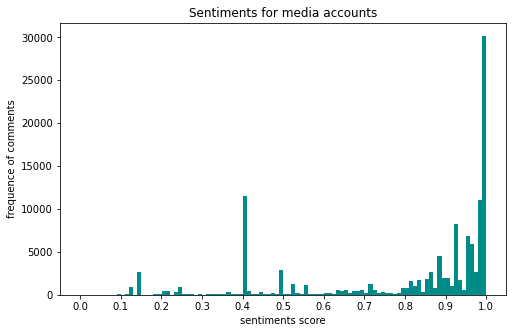

In [16]:
#画出总体情绪
plt.figure(figsize=(8,5))
plt.hist(weight_mediacom['sentiments'],bins=100, facecolor="darkcyan") #edgecolor="gray", alpha=0.7)
plt.xlabel('sentiments score')
plt.ylabel('frequence of comments')
plt.xticks(numpy.arange(0, 1.1, 0.1))
plt.title('Sentiments for media accounts')

In [17]:
for i in range(10):
    com = mediacom[mediacom['sentiments'] < 0.42].iloc[i]
    #a = com['Comments']
    #print(com['Usename'])
    if com['isFan'] == True:
        print('Fan')
    print(str(i+1)+' '+str(com['Usename'])+':'+str(com['Comments'])+str(com['Like_count']))
    print('---')
    #print(com['Like_count'])

1 唐三是个小暖心:"其实小蔡本身就没什么实质性黑点吧 所以一时的玩梗也不会一直持续 现在看就是挺好的一个小朋友"23024.0
---
2 单单crush:"所以还是要了解才能下定论"5369.0
---
3 赞比星途璀璨:"网络上的你重拳出击 现实中的你不堪一击"1645.0
---
4 隨遇邇an:"来啦来啦，徐坤太有梗了高冷呀"1630.0
---
5 肉包里面全是菜:"又可以更了解他了，喜欢这个专访。"761.0
---
6 肉包里面全是菜:"又可以更了解他了，喜欢这个专访。  网页链接"761.0
---
Fan
7 刘爱坤Alan:"太可爱了吧啊啊啊啊啊我在现场我差点昏倒"742.0
---
8 kunwannaget炫:"你去便利店不都拎着三大袋回来的么蔡徐坤"583.0
---
Fan
9 蔡小葵的卷儿:"做好准备的人一定会得到一颗糖。"490.0
---
Fan
10 八月的小狮子冲呀:"所以不要跟风黑任何一个人 了解之后再评价吧"108.0
---


In [18]:
mediacom[(mediacom['blogger'] == 'mgyl')&(mediacom['sentiments']>0.5)]

,Usename,Time,Like_count,Comments,blogger,sentiments,weight,isFan
1,吃菜菜不吃菜菜-,Thu Mar 12 21:03:23 +0800 2020,16527.0,"""不是自嘲 是释然是算了是大方回应被恶意剪辑鬼畜掩盖了的兴趣爱好本身 温柔地说出“ 篮球是...",mgyl,0.999998,8263.5,True
2,282号发光虫,Thu Mar 12 20:04:19 +0800 2020,10549.0,"""多一些了解和靠近这个只是坚持自己的热爱的大男孩吧""",mgyl,0.928632,5274.5,True
3,抱月亮睡,Thu Mar 12 21:03:43 +0800 2020,9425.0,"""“喜欢唱 跳 rap 篮球“小蔡一直说的都是“喜欢篮球“恶意鬼畜剪辑可以使一个人面目全非，...",mgyl,0.997223,4712.5,False
8,WiiiiKUN,Thu Mar 12 20:03:58 +0800 2020,5321.0,"""青春是漫长人生里最缤纷的色彩,热爱便是青春最美好的注解。同青春制作人代表@蔡徐坤 一起，为...",mgyl,1.000000,2660.5,True
10,KUN_柠萌,Thu Mar 12 20:03:46 +0800 2020,5180.0,"""蔡pd坚持你热爱的，我们一直在""",mgyl,0.952057,2590.0,True
15,桃子味的葵花籽,Thu Mar 12 20:11:11 +0800 2020,2957.0,"""不知道说什么好，心情很复杂，他能释怀是最好的。。。。就希望以后能开心吧""",mgyl,0.882213,1478.5,True
19,短K腿U猫N,Thu Mar 12 20:04:22 +0800 2020,2752.0,"""“别着急回应所有的声音，你的作品是舞台”期待蔡pd""",mgyl,0.908156,1376.0,False
27,小太阳o3o,Thu Mar 12 20:04:18 +0800 2020,1951.0,"""坚持热爱""",mgyl,0.830508,975.5,False
28,·绝缘体KUN·,Thu Mar 12 20:04:29 +0800 2020,1850.0,"""别着急回应所有的声音，你的作品是舞台。""",mgyl,0.550254,925.0,True
38,菜叶奎葵,Thu Mar 12 20:04:29 +0800 2020,1133.0,"""别着急回应所有的声音，你的作品是舞台 期待蔡PD""",mgyl,0.916549,566.5,True


## 自媒体和个人

In [77]:
indivcom = pd.read_csv('indivCom.csv')

In [20]:
first_indivcom = indivcom

In [21]:
len(first_indivcom)

11895

In [22]:
#去掉虞书欣相关微博
indivcom = indivcom[~(indivcom['blogger'] == 'ezqby')]
len(indivcom)

6911

In [23]:
indivcom['weight']= indivcom['Like_count']/2 #两个赞算一个评论
indivcom.head()

C:\Users\cyane\Downloads\Python\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Usename,Time,Like_count,Comments,blogger,weight
4984,0,柠栀去洗头了,Wed Mar 18 12:33:42 +0800 2020,966,"""作品即是他最好的盔甲""",fashion,483.0
4985,1,仲长莎莉清清,Wed Mar 18 12:34:38 +0800 2020,805,"""永远寻求突破，永远不懈努力，最终成就闪耀的自己 蔡徐坤一直用作品说话！""",fashion,402.5
4986,2,春色梅子酒,Wed Mar 18 12:33:57 +0800 2020,653,"""用时间来证明一切""",fashion,326.5
4987,3,KUN的Rock少女碎碎,Wed Mar 18 12:32:50 +0800 2020,576,"""作品就是他最好的盔甲""",fashion,288.0
4988,4,K优恩的流羽酱,Wed Mar 18 12:34:35 +0800 2020,419,"""作品就是他最好的铠甲""",fashion,209.5


In [24]:
indivcom = indivcom.drop(columns = ['Unnamed: 0'])
indivcom.head(20)

,Usename,Time,Like_count,Comments,blogger,weight
4984,柠栀去洗头了,Wed Mar 18 12:33:42 +0800 2020,966,"""作品即是他最好的盔甲""",fashion,483.0
4985,仲长莎莉清清,Wed Mar 18 12:34:38 +0800 2020,805,"""永远寻求突破，永远不懈努力，最终成就闪耀的自己 蔡徐坤一直用作品说话！""",fashion,402.5
4986,春色梅子酒,Wed Mar 18 12:33:57 +0800 2020,653,"""用时间来证明一切""",fashion,326.5
4987,KUN的Rock少女碎碎,Wed Mar 18 12:32:50 +0800 2020,576,"""作品就是他最好的盔甲""",fashion,288.0
4988,K优恩的流羽酱,Wed Mar 18 12:34:35 +0800 2020,419,"""作品就是他最好的铠甲""",fashion,209.5
4989,穆勒女票,Wed Mar 18 12:33:49 +0800 2020,357,"""作品是他最好的盔甲""",fashion,178.5
4990,K幼恩初见藍玫瑰,Wed Mar 18 12:33:12 +0800 2020,318,"""作品是他最好的盔甲！时间会证明一切""",fashion,159.0
4991,是福猪陌陌吖,Wed Mar 18 12:34:57 +0800 2020,248,"""你的作品是舞台！不要着急回应所有的声音！[贊]""",fashion,124.0
4992,小猪无语惹,Wed Mar 18 12:34:31 +0800 2020,183,"""你的作品就是舞台""",fashion,91.5
4993,困困喏·,Wed Mar 18 12:35:24 +0800 2020,156,"""作品是舞台，也是最好的盔甲@蔡徐坤""",fashion,78.0


In [25]:
s2 =[SnowNLP(com).sentiments for com in indivcom['Comments']]
indivcom['sentiments'] = s2

In [26]:
indivcom = indivcom.sort_values('Like_count',ascending = False)
indivcom = indivcom.reset_index()
indivcom.head()

,index,Usename,Time,Like_count,Comments,blogger,weight,sentiments
0,6186,荷兰豆养殖专家,Thu Mar 12 21:53:44 +0800 2020,8187,"""我没看过偶，我承认我后悔了""",hld,4093.5,0.116857
1,6187,七分甜落,Thu Mar 12 21:53:31 +0800 2020,6747,"""他C位定有他的理由 我没追那年偶 但他在快本给谢娜挡锅真的有戳我""",hld,3373.5,0.954489
2,6188,青春有你2-懒羊羊,Thu Mar 12 21:52:06 +0800 2020,5342,"""我好后悔当年没看偶练，让我失去了一个老公""",hld,2671.0,0.504486
3,6189,生无可恋的尖尖,Thu Mar 12 21:52:04 +0800 2020,4556,"""确实今晚突然就get到他了""",hld,2278.0,0.607222
4,6190,ulxxgnim,Thu Mar 12 21:59:07 +0800 2020,4349,"""我对他没啥好改观的，因为本来他就没做错什么，cxk一直都是这样的，无脑跟风黑的人需要改改自...",hld,2174.5,0.031408


In [27]:
grouping(indivcom)

In [28]:
#indivcom.to_csv('indivcom_fan_sen.csv')

In [29]:
weight_indivcom = indivcom
for i in range(len(indivcom)):
    row = indivcom.iloc[i]
    comweight = round(row['weight'])
    if comweight>0:
        weight_indivcom = weight_indivcom.append([pd.DataFrame(row).T]*int(comweight))
    else:
        break

In [30]:
len(weight_indivcom)

38752

In [31]:
a = len(weight_indivcom[weight_indivcom['isFan']==False])
a

35009

In [32]:
b = len(weight_indivcom[weight_indivcom['isFan']==True])
b

3743

In [33]:
#len(indivcom)+sum(round(indivcom['weight']))

Text(0.5, 1.0, 'Sentiments for individual accounts')

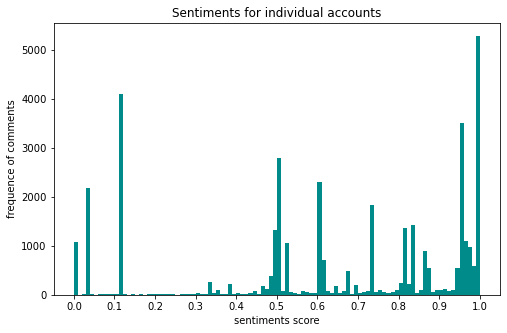

In [34]:
#画出总体情绪，可加x轴和y轴标签
plt.figure(figsize=(8,5))
plt.hist(weight_indivcom['sentiments'],bins=100, facecolor="darkcyan") #edgecolor="gray", alpha=0.7)
plt.xlabel('sentiments score')
plt.ylabel('frequence of comments')
plt.xticks(numpy.arange(0, 1.1, 0.1))
plt.title('Sentiments for individual accounts')

## 情感分析

#### 媒体机构

In [35]:
#粉丝情绪

fan_mediacom = weight_mediacom[weight_mediacom['isFan']==True]
#len(fan_indivcom)

#fan_sen=list(fan_mediacom['sentiments'])
#for i in range(len(fan_mediacom)):
 #   row = fan_mediacom.iloc[i]
  #  comweight = round(row['weight'])
   # if comweight>0:
    #    fan_sen = fan_sen+[row['sentiments']]*int(comweight)
    #else:
     #   break

In [36]:
len(fan_mediacom)

46760

Text(0.5, 1.0, 'Sentiments for Fans')

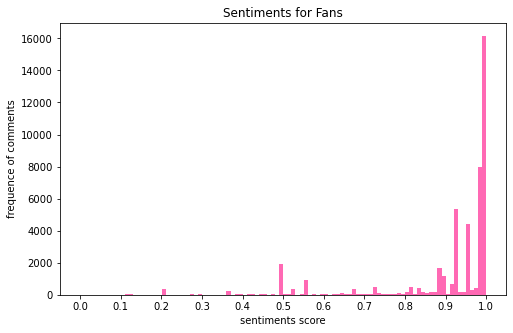

In [37]:
plt.figure(figsize=(8,5))
plt.hist(fan_mediacom['sentiments'],bins=100, facecolor="hotpink") #edgecolor="gray", alpha=0.7)
plt.xlabel('sentiments score')
plt.ylabel('frequence of comments')
plt.xticks(numpy.arange(0, 1.1, 0.1))
plt.title('Sentiments for Fans')

In [38]:
#fanmediacom = mediacom[mediacom['isFan'] == True]
#a = fan_mediacom[(fan_mediacom['sentiments']>0.49) & (fan_mediacom['sentiments']<0.54)]
#len(a)
#fan_mediacom[fan_mediacom['sentiments']==0.5] 

In [39]:
fanmediacom = mediacom[mediacom['isFan'] == True]
#fanmediacom[fanmediacom['sentiments']==0.5] 

In [40]:
#mediacom[mediacom['sentiments']>0.8]

In [41]:
#非粉丝情绪

nofan_mediacom = weight_mediacom[weight_mediacom['isFan']==False]
#len(nofan_indivcom)
#nofan_sen=list(nofan_mediacom['sentiments'])
#for i in range(len(nofan_mediacom)):
 #   row = nofan_mediacom.iloc[i]
  #  comweight = round(row['weight'])
   # if comweight>0:
    #    nofan_sen = nofan_sen+[row['sentiments']]*int(comweight)
    #else:
     #   break

Text(0.5, 1.0, 'Sentiments for non-Fans accounts')

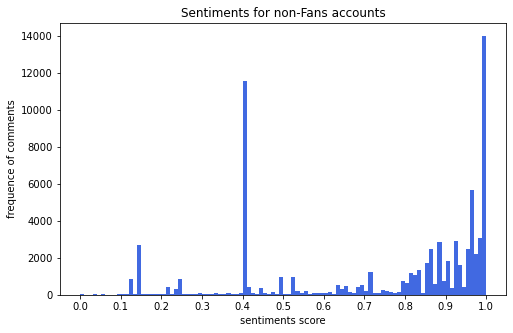

In [42]:
plt.figure(figsize=(8,5))
plt.hist(nofan_mediacom['sentiments'],bins=100, facecolor="royalblue") #edgecolor="gray", alpha=0.7)
plt.xlabel('sentiments score')
plt.ylabel('frequence of comments')
plt.xticks(numpy.arange(0, 1.1, 0.1))
plt.title('Sentiments for non-Fans accounts')

In [43]:
nofan_mediacom[(nofan_mediacom['sentiments']>0.39)&(nofan_mediacom['sentiments']<0.41)].head(5)

,Usename,Time,Like_count,Comments,blogger,sentiments,weight,isFan
0,唐三是个小暖心,Thu Mar 12 20:44:17 +0800 2020,23024,"""其实小蔡本身就没什么实质性黑点吧 所以一时的玩梗也不会一直持续 现在看就是挺好的一个小朋友""",mgyl,0.406927,11512,False
207,AugustGilding-,Thu Mar 12 13:01:56 +0800 2020,28,"""文字版专访！来啦来啦！""",wyyl,0.392894,14,False
291,呦呦鹿鸣258,Sun Mar 15 13:45:14 +0800 2020,8,"""大厂工友一出手，热搜必须搞到手""",xlzy,0.394457,4,False
355,quintytao,Mon Mar 16 17:56:01 +0800 2020,5,"""ella采访每次都好好笑 @Star小盆友吖""",xlyl,0.402625,2.5,False
433,我没烟花绚丽,Thu Mar 12 22:07:17 +0800 2020,3,"""其实小蔡本身就没什么实质性黑点吧 所以一时的玩梗也不会一直持续 现在看就是挺好的一个小朋友""",mgyl,0.406927,1.5,False


In [44]:
nofan_mediacom[(nofan_mediacom['sentiments']>0.13)&(nofan_mediacom['sentiments']<0.16)]

,Usename,Time,Like_count,Comments,blogger,sentiments,weight,isFan
7,单单crush,Thu Mar 12 20:09:52 +0800 2020,5369,"""所以还是要了解才能下定论""",mgyl,0.14774,2684.5,False
30,赞比星途璀璨,Mon Mar 16 17:31:43 +0800 2020,1645,"""网络上的你重拳出击 现实中的你不堪一击""",xlyl,0.130083,822.5,False
321,Bulingbuling二毛,Thu Mar 26 21:28:03 +0800 2020,6,"""我坤内心OS：就是有点不好意思，真的很尴尬啊！不能太油腻""",wbzy,0.133835,3,False
533,安琪-kun,Thu Mar 12 13:37:05 +0800 2020,2,"""我只回答最后一个问题，想和你早生贵子""",wyyl,0.157857,1,False
828,你是可爱多_,Fri Mar 13 06:32:37 +0800 2020,1,"""没黑料这句话真的有点搞笑哦一群粉丝假装路人说粉了洗白之路开始了之前做的就可以当做没发生吗""",mgyl,0.157182,0.5,False
944,_人间毒药,Sun Mar 15 13:41:23 +0800 2020,1,"""我现在知道了/冲鸭 充分暴露了你没有5G的事实""",xlzy,0.136036,0.5,False
2539,门金金呐,Fri Mar 13 00:39:48 +0800 2020,0,"""@我有一只咩咩咩呦""",mgyl,0.138904,0,False
2593,可可可可人儿,Fri Mar 13 08:48:29 +0800 2020,0,"""就目前更新的来说，这节目是真的难看""",mgyl,0.158994,0,False
2878,安妮博主,Fri Mar 13 00:45:34 +0800 2020,0,"""冲鸭 网页链接""",mgyl,0.130918,0,False
2885,只怪我是意中人,Fri Mar 13 00:43:30 +0800 2020,0,"""怎么没看到嫩牛五方？""",mgyl,0.159226,0,False


#### 自媒体和个人

In [45]:
#粉丝情绪

fan_indivcom = weight_indivcom[weight_indivcom['isFan']==True]
#len(fan_indivcom)

#fan_sen=list(fan_indivcom['sentiments'])
#for i in range(len(fan_indivcom)):
    #row = fan_indivcom.iloc[i]
    #comweight = round(row['weight'])
    #if comweight>0:
        #fan_sen = fan_sen+[row['sentiments']]*int(comweight)
    #else:
        #break

In [46]:
len(fan_indivcom)

3743

Text(0.5, 1.0, 'Sentiments for Fans')

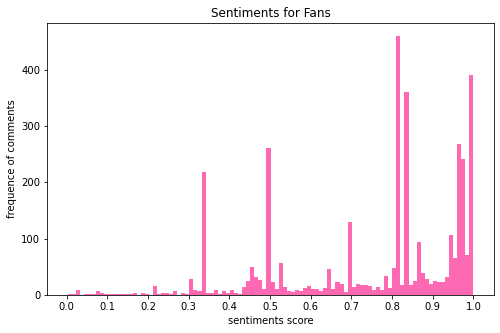

In [47]:
plt.figure(figsize=(8,5))
plt.hist(fan_indivcom['sentiments'],bins=100, facecolor="hotpink") #edgecolor="gray", alpha=0.7)
plt.xlabel('sentiments score')
plt.ylabel('frequence of comments')
plt.xticks(numpy.arange(0, 1.1, 0.1))
plt.title('Sentiments for Fans')

In [48]:
fanindivcom = indivcom[indivcom['isFan'] == True]
a = fanindivcom[(fanindivcom['sentiments']>0.48)&(fanindivcom['sentiments']<0.51)]

In [49]:
len(fan_indivcom[(fan_indivcom['sentiments']>0.48)&(fan_indivcom['sentiments']<0.51)])

278

In [50]:
len(a)+sum(round(a['weight']))

278.0

In [51]:
#非粉丝情绪
nofan_indivcom = weight_indivcom[weight_indivcom['isFan']==False]

In [52]:
len(nofan_indivcom)

35009

Text(0.5, 1.0, 'Sentiments for non-Fans')

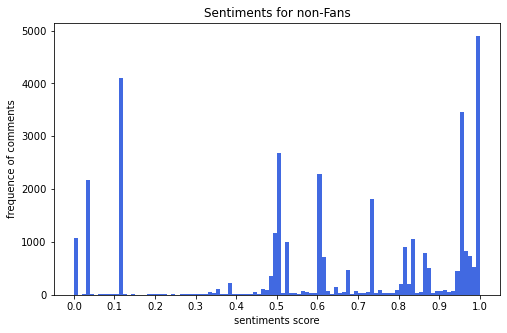

In [53]:
plt.figure(figsize=(8,5))
plt.hist(nofan_indivcom['sentiments'],bins=100, facecolor="royalblue") #edgecolor="gray", alpha=0.7)
plt.xlabel('sentiments score')
plt.ylabel('frequence of comments')
plt.xticks(numpy.arange(0, 1.1, 0.1))
plt.title('Sentiments for non-Fans')

In [54]:
for i in range(10):
    com = indivcom[indivcom['sentiments'] < 0.51].iloc[i]
    #a = com['Comments']
    #print(com['Usename'])
    if com['isFan'] == True:
        print('Fan')
    print(str(i+1)+' '+str(com['Usename'])+':'+str(com['Comments'])+str(com['Like_count']))
    print('---')
    #print(com['Like_count'])
    

1 荷兰豆养殖专家:"我没看过偶，我承认我后悔了"8187
---
2 青春有你2-懒羊羊:"我好后悔当年没看偶练，让我失去了一个老公"5342
---
3 ulxxgnim:"我对他没啥好改观的，因为本来他就没做错什么，cxk一直都是这样的，无脑跟风黑的人需要改改自己的脑袋，而不是改对他的观。"4349
---
4 iamatudou:"说真的，青2让我看到了偶练巨C真的不是白叫的，有点后悔给他投路人票投少了"1871
---
5 帅了个仔:"他可真好看 我真肤浅"1182
---
6 春色梅子酒:"用时间来证明一切"653
---
Fan
7 快乐星球825号:"我看了之后对他的好感直升 而且前两天看营销号发的开枪的舞蹈动作真的有杀到我"419
---
8 小沈同学今天努力了吗:"最开始知道他是星动亚洲，妈耶！！！还有婴儿肥的脸听说偶练有他我才开始追的偶练"413
---
9 夏日赏味限定-:"之前和姐妹一起看偶练就觉得他站在舞台上好吸睛哦，一百多个人跳舞就只能看到他（不是因为他站c位的原因）所以后来全网黑他的时候我也黑不起来，毕竟能力在那儿啊！不过u1s1，他是不是微调了？我感觉看偶练的时候他脸还有点不对称，但今晚看他好帅哦！（粉丝别来喷我，谢谢"268
---
10 是福猪陌陌吖:"你的作品是舞台！不要着急回应所有的声音！[贊]"248
---


In [55]:
nofanindivcom = indivcom[indivcom['isFan'] == False]
sum(nofanindivcom['weight'])+4790 
#a = fanindivcom[(fanindivcom['sentiments']>0.8)&(fanindivcom['sentiments']<0.83)]
#sum(a['weight'])

35143.0

In [56]:
len(weight_indivcom[weight_indivcom['isFan']==True])

3743

In [57]:
df = weight_mediacom[['Time','sentiments','isFan','blogger','weight']]
df.to_csv('weight_mediacom.csv')

In [58]:
df2 = weight_indivcom[['Time','sentiments','isFan','blogger','weight']]
df2.to_csv('weight_indivcom.csv')

In [59]:
#https://blog.csdn.net/Kwoky/article/details/84637091 转换日期格式

In [60]:
#mediacom.head()

In [61]:
mediacom.to_csv('fullMediacom.csv')

In [62]:
#indivcom.head()

In [63]:
indivcom.to_csv('fullIndivcom.csv')